In [1]:
# SUPERVISED LEARNING - Logistic Regression & Decision Tree

import os
import pandas as pd

path = 'C:/Users/yasin/Desktop/COMP-309/Week-8'
file = 'bank.csv'

fullpath = os.path.join(path, file)
data1 = pd.read_csv(fullpath, sep=';')

data1.columns.values
data1.shape
data1.describe()
# data1.dtypes
# data1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# 1-change the y column from object to integer, this is the class or label column
data1['y'] = (data1['y'] == 'yes').astype(int)
#data1.head(30)

In [15]:
# Reduce the categories of the education column
data1['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [18]:
# Reduce the categories of the education column
import numpy as np
data1['education']=np.where(data1['education'] == 'basic.9y', 'Basic', data1['education'])
data1['education']=np.where(data1['education'] =='basic.6y', 'Basic', data1['education'])
data1['education']=np.where(data1['education'] =='basic.4y', 'Basic', data1['education'])
data1['education']=np.where(data1['education'] =='university.degree', 'University Degree', data1['education'])
data1['education']=np.where(data1['education'] =='professional.course', 'Professional Course', data1['education'])
data1['education']=np.where(data1['education'] =='high.school', 'High School', data1['education'])
data1['education']=np.where(data1['education'] =='illiterate', 'Illiterate', data1['education'])
data1['education']=np.where(data1['education'] =='unknown', 'Unknown', data1['education'])

data1['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [21]:
# Check the values of who purchased the deposit account
data1['y'].value_counts()


no     3668
yes     451
Name: y, dtype: int64

In [23]:
#Check the average of all the numeric columns
pd.set_option('display.max_columns', 100)
data1.groupby('y').mean()

           age   duration  campaign       pdays  previous  emp.var.rate  \
y                                                                         
no   39.895311  219.40976  2.605780  982.763086  0.141767      0.240185   
yes  41.889135  560.78714  1.980044  778.722838  0.585366     -1.177384   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.599677     -40.586723   3.802826  5175.502072  
yes       93.417268     -39.786475   2.145448  5093.118625  


In [24]:
# Check the mean of all numeric columns grouped by education
data1.groupby('education').mean()

                           age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.337124  253.898457  2.429732  978.815597  0.149472   
High School          38.097720  258.534202  2.630836  958.022801  0.206298   
Illiterate           42.000000  146.000000  4.000000  999.000000  0.000000   
Professional Course  40.207477  278.816822  2.512150  958.211215  0.194393   
University Degree    39.017405  247.707278  2.583070  947.900316  0.207278   
Unknown              42.826347  267.281437  2.538922  939.700599  0.263473   

                     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
education                                                                     
Basic                    0.237368       93.658600     -41.120552   3.775701   
High School             -0.002497       93.564314     -40.995765   3.511732   
Illiterate              -2.900000       92.201000     -31.4

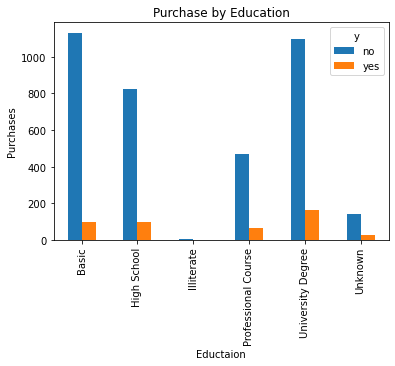

In [34]:
#Plot a histogram showing purchase by education category
import matplotlib.pyplot as plt
pd.crosstab(data1['education'], data1['y']).plot(kind='bar')
plt.xlabel('Eductaion')
plt.ylabel('Purchases')
plt.title('Purchase by Education')
plt.show()

Text(0, 0.5, 'Proportion of Customers')

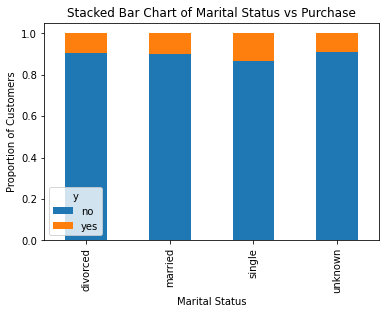

In [35]:
# Draw a stacked bar chart of the marital status and the purchase of term deposit to see whether this can be a good predictor of the outcome
table=pd.crosstab(data1['marital'], data1['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

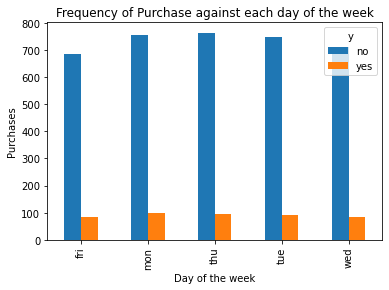

In [36]:
#Plot the bar chart for the Frequency of Purchase against each day of the week to see whether this can be a good predictor of the outcome
pd.crosstab(data1['day_of_week'], data1['y']).plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Purchases')
plt.title('Frequency of Purchase against each day of the week')
plt.show()

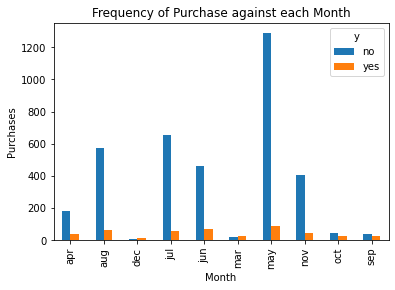

In [37]:
#Repeat step h for the month
pd.crosstab(data1['month'], data1['y']).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Purchases')
plt.title('Frequency of Purchase against each Month')
plt.show()

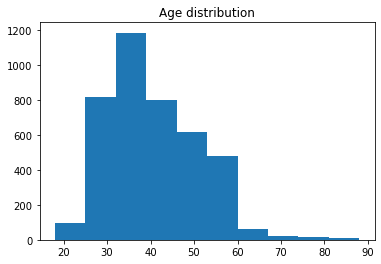

In [38]:
#Plot a histogram of the age distribution
plt.hist(data1['age'])
plt.title('Age distribution')
plt.show()

In [39]:
# 4- Deal with the categorical variables, as follows:
# a. Create the dummy variables , use a loop

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    print(cat_list)
    cat_list = pd.get_dummies(data1[var], prefix=var)
    data2 = data1.join(cat_list)
    data1 = data2
data1.head(2)

var_job
var_marital
var_education
var_default
var_housing
var_loan
var_contact
var_month
var_day_of_week
var_poutcome


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_High School,education_Illiterate,education_Professional Course,education_University Degree,education_Unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [40]:
# 2- Remove the original columns
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data1_vars = data1.columns.values.tolist()

to_keep = [i for i in data1_vars if i not in cat_vars]

data1_final = data1[to_keep]
data1_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [41]:
data1_final_vars = data1_final.columns.values.tolist()

Y = ['y']
X = [i for i in data1_final_vars if i not in Y]

type(X)
type(Y)

list

In [47]:
# 5- Carryout feature selection and update the data, as follows:
# a. Carry out feature selection using the REF module from sklearn.model_selection to select only 12 feature

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=12)
rfe = rfe.fit(data1_final[X], data1_final[Y])
print(rfe.support_)
print(rfe.ranking_)

ValueError: Boolean array expected for the condition, not int64

In [44]:
# b. Update X and Y to reflect only 12 features
cols=['previous', 'euribor3m', 'job_entrepreneur', 'job_self-employed', 'poutcome_success', 'poutcome_failure', 'month_oct', 
      'month_may', 'month_mar', 'month_jun', 'month_jul', 'month_dec']

X=data1_final[cols]
Y=data1_final['y']
type(X)
type(Y)

pandas.core.series.Series

In [45]:
# 6- Build the logistic regression model as follows:

#1- split the data into 70%training and 30% for testing, note added the solver to avoid warnings

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

In [49]:
# 2-Let us build the model and validate the parameters
from sklearn import metrics

clf1 = LogisticRegression(solver='lbfgs')
clf1.fit(X_train, Y_train)

LogisticRegression()

In [50]:
#3- Run the test data against the new model

probs = clf1.predict_proba(X_test)
print(probs)

predicted = clf1.predict(X_test)
print(predicted)


[[0.93328827 0.06671173]
 [0.88302238 0.11697762]
 [0.93018283 0.06981717]
 ...
 [0.73534072 0.26465928]
 [0.97847894 0.02152106]
 [0.24596262 0.75403738]]
['no' 'no' 'no' ... 'no' 'no' 'yes']


In [51]:
#4-Check model accuracy

print(metrics.accuracy_score(Y_test, predicted))

0.9021035598705501


In [53]:
# 7- To avoid sampling bias run cross validation for 10 times, as follows:
# a. Use the cross_val_score module from sklearn.model_selection and set the parameters

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(solver='lbfgs'), X, Y, scoring='accuracy', cv=10)

# b. Save the results of each run in scores
print(scores)

# c. Produce the mean
print(scores.mean())

[0.92718447 0.90048544 0.90291262 0.89320388 0.90533981 0.90533981
 0.8907767  0.89563107 0.89805825 0.90024331]
0.9019175347837383


In [56]:
# 8- Generate the confusion matrix as follows:

# a. Prepare two arrays one for the predicted values Y_P and one for actual values Y_A of the test. 
# For the predicted use a threshold of 0.05, this means if the probability is higher than 0.05 the model will classify the 
# instance as 1 and if it is lower than 0.05 it will be classified as 0.

prob = probs[:,1]
prob_df = pd.DataFrame(prob)
prob_df['predict'] = np.where(prob_df[0]>=0.05, 'yes', 'no')

Y_A = Y_test.values
Y_P = np.array(prob_df['predict'])

# b. Use the confusion_matrix option from the sklearn.metrics module to generate the matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_A, Y_P)
print(confusion_matrix)

[[413 701]
 [ 15 107]]


In [59]:
#Decision Tree

# 1- Load and Explore dataset

import pandas as pd
import os

path = "C:/Users/yasin/Desktop/COMP-309/Week-9"
filename = 'iris1.csv'

fullpath = os.path.join(path,filename)
data_viji_i = pd.read_csv(fullpath,sep=',')
print(data_viji_i)
print(data_viji_i.columns.values)
print(data_viji_i.shape)
print(data_viji_i.describe())
print(data_viji_i.dtypes) 
print(data_viji_i.head(5))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width' 'Species']
(150, 5)
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    

In [60]:
print(data_viji_i['Species'].unique())

['setosa' 'versicolor' 'virginica']


In [61]:
# 2- Separate the predictors from the target then split the dataset using numpy random function

#  Splitting the predictor and target variables
columns = data_viji_i.columns.values.tolist()

predictor = columns[:4]  #col - 0,1,2,3
target = columns[4]

print(target)

Species


In [64]:
# splitting the dataset into train and test variables
data_viji_i['is_train'] = np.random.uniform(0, 1, len(data_viji_i)) <= .75
print(data_viji_i.head(5))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  is_train
0           5.1          3.5           1.4          0.2  setosa     False
1           4.9          3.0           1.4          0.2  setosa     False
2           4.7          3.2           1.3          0.2  setosa      True
3           4.6          3.1           1.5          0.2  setosa      True
4           5.0          3.6           1.4          0.2  setosa      True


In [65]:
# Create two new dataframes, one with the training rows, one with the test rows
train = data_viji_i[data_viji_i['is_train'] == True]
test = data_viji_i[data_viji_i['is_train'] == False]

print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 112
Number of observations in the test data: 38


In [68]:
# 4- Build the decision tree using the training dataset. Use enotrpy as a method for splitting, and split only when reaching 20 matches.

from sklearn.tree import DecisionTreeClassifier

dt_viji = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
dt_viji.fit(train[predictor], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [73]:
# 5- Test the model using the testing dataset and calculate a confusion matrix this time using pandas

preds = dt_viji.predict(test[predictor])
pd.crosstab(test['Species'],preds,rownames=['Actual'],colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,9,2
virginica,0,1,13


In [75]:
# 6- Generate a dot file and visualize the tree using the online vizgraph editor and share (download) as picture.

from sklearn.tree import export_graphviz

with open('C:/Users/yasin/Desktop/COMP-309/Week-9/dtree1.dot', 'w') as dotfile:
    export_graphviz(dt_viji, out_file=dotfile, feature_names=predictor)

dotfile.close()

[Text(0.4, 0.875, 'Petal.Length <= 2.6\nentropy = 1.584\nsamples = 112\nvalue = [37, 39, 36]\nclass = versicolor'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'Petal.Width <= 1.75\nentropy = 0.999\nsamples = 75\nvalue = [0, 39, 36]\nclass = versicolor'),
 Text(0.4, 0.375, 'Petal.Length <= 4.95\nentropy = 0.281\nsamples = 41\nvalue = [0, 39, 2]\nclass = versicolor'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

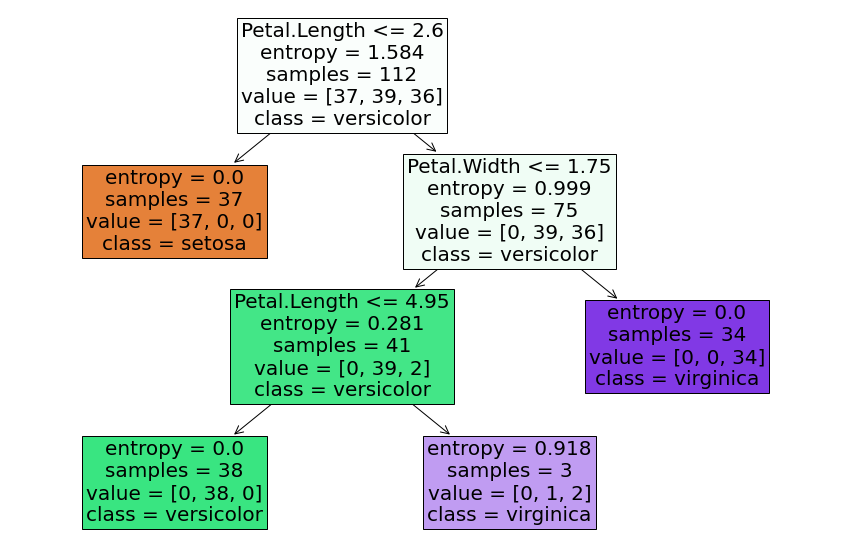

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(dt_viji, feature_names=predictor, class_names=list(dt_viji.classes_), filled=True, rounded=False, fontsize=20)

In [77]:
# 7- Let us build the tree classifier again but this time let us split the data into 80% for training and 20% for testing:

X=data_viji_i[predictor]
Y=data_viji_i[target]

#split the data sklearn module
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2)

In [81]:
# 8- Let us now build the tree using the training as follows:

# a. Set the tree parameters
dt1_viji = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=20, random_state=99)

# b. Fit the training data
dt1_viji.fit(trainX,trainY)

# c. Use the cross validation module and carry out a ten cross validation
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# d. Use the sklearn metrics module to generate the score for the cross validation(i.e. build the model 10 times)
from sklearn.model_selection import cross_val_score
score = np.mean(cross_val_score(dt1_viji, trainX, trainY, scoring='accuracy', cv=crossvalidation, n_jobs=1))

# e. Print the mean of the ten time runs
print(score.mean())

0.9583333333333333


In [83]:
# 9- Now let us test the model using the testing data i.e. the 20%:
# a. Use the predict method and pass the 20% test data without labels 
# i.e testX. This should generate the predicted data store it in testY_predic
testY_predict = dt1_viji.predict(testX)
testY_predict.dtype

# b. Use the metrics module from sklearn to calculate the score and the confusion matrix
from sklearn import metrics 
labels = Y.unique()
print(labels)
print("Accuracy:",metrics.accuracy_score(testY, testY_predict))

#Let us print the confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix \n" , confusion_matrix(testY, testY_predict, labels=labels))

['setosa' 'versicolor' 'virginica']
Accuracy: 0.9333333333333333
Confusion matrix 
 [[14  0  0]
 [ 0  9  1]
 [ 0  1  5]]


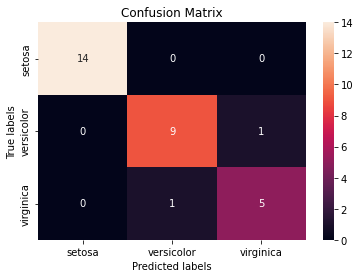

In [84]:
# 10- Use Seaborn heatmaps to print the confusion matrix in a more clear and fancy way
import seaborn as sns
import matplotlib.pyplot as plt  

cm = confusion_matrix(testY, testY_predict, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #cannot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); 
ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);
plt.show()

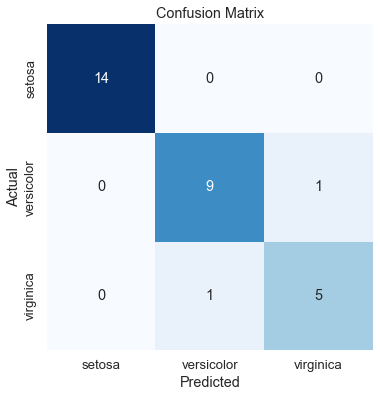

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(testY, testY_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust the font size as needed

# Create the heatmap with labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=labels,
            yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [90]:
# Do a feature importance test to determine which of the variables in the preceding dataset are actually important for the model. 
feature_importances = dt1_viji.feature_importances_
feature_names = train[predictor].columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
feature_importances_dict

{'Sepal.Length': 0.0,
 'Sepal.Width': 0.0,
 'Petal.Length': 0.6310663674178182,
 'Petal.Width': 0.3689336325821818}